In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
print("done")

done


In [4]:
read_df = pd.read_csv("train.csv")
df = read_df.copy()
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

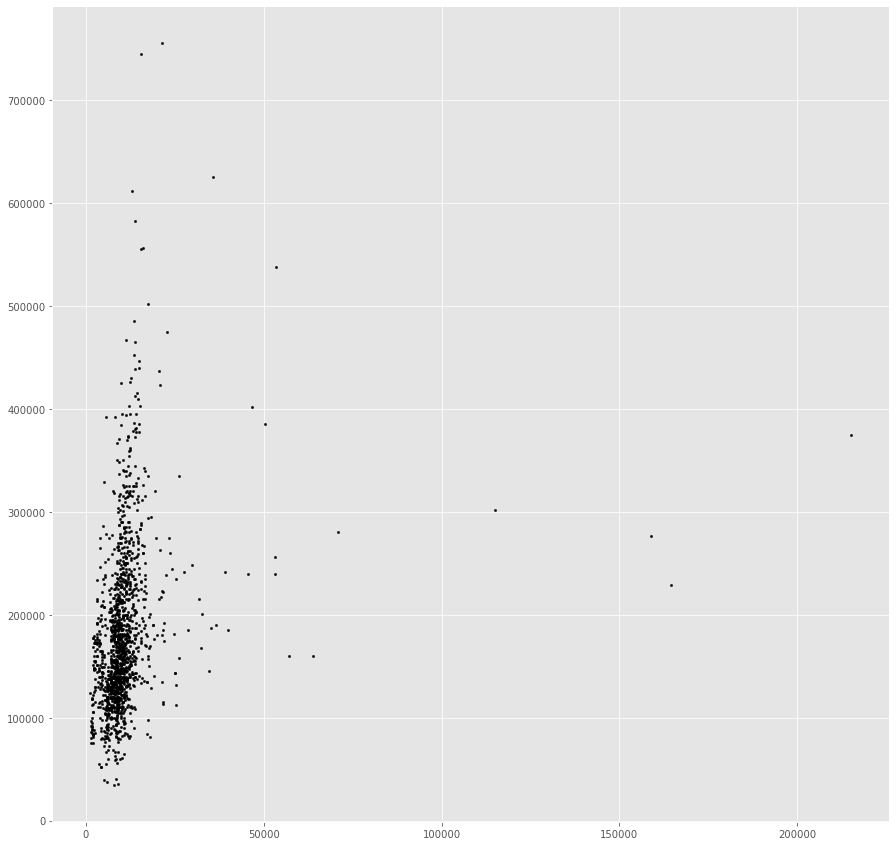

In [5]:
fig = plt.figure(figsize = (15,15))
style.use('ggplot')
plt.scatter(df.LotArea, df.SalePrice, s=5, c='k')

Text(0.5, 0, 'J')

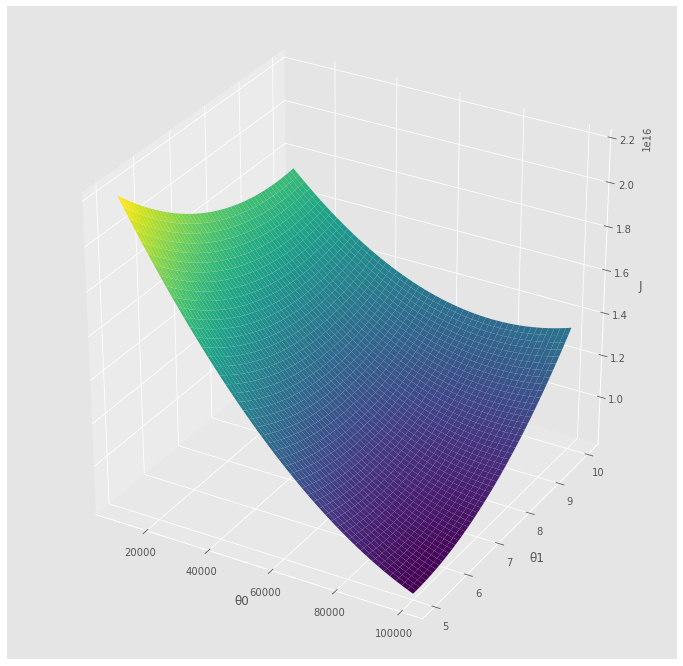

In [6]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
m = len(df.LotArea)
theta_0 = np.linspace(10000, 100000, num = 1000)
theta_1 = np.linspace(5, 10, num = 1000)
Theta_0, Theta_1 = np.meshgrid(theta_0, theta_1)
def cost(theta_0, theta_1, LotArea, SalePrice):
    h = 0
    for i in range(len(LotArea)):
        h += (((theta_0 + (theta_1 * LotArea[i])) - SalePrice[i]) **            2)
    J = (1/2*len(LotArea)) * h
    return J
fig = plt.figure(figsize = (12,12))
style.use('ggplot')
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(Theta_0, Theta_1, cost(Theta_0, Theta_1, df.LotArea, df.SalePrice), cmap = 'viridis')
ax.set_xlabel('θ0')
ax.set_ylabel('θ1')
ax.set_zlabel('J')

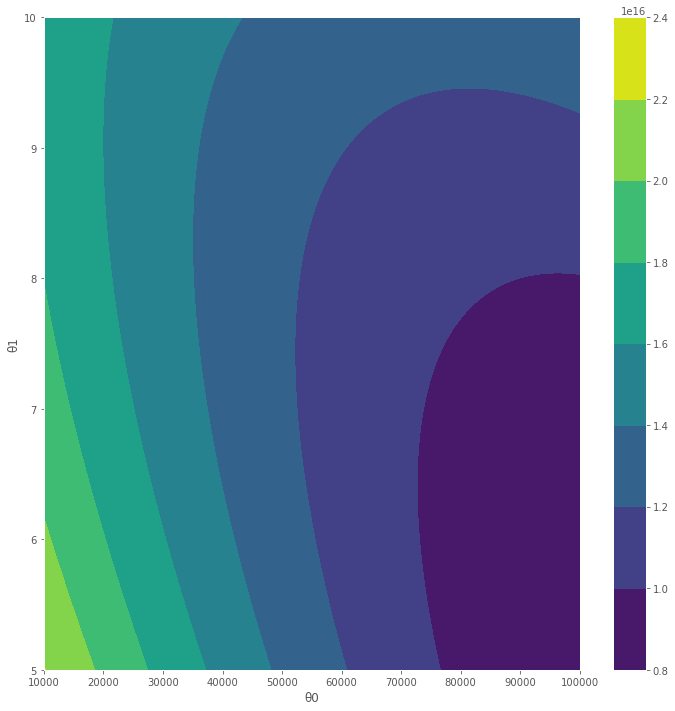

In [8]:
fig = plt.figure(figsize = (12,12))
style.use('ggplot')
ax = fig.add_subplot(111)
cs = ax.contourf(Theta_0, Theta_1, cost(Theta_0, Theta_1, df.LotArea, df.SalePrice))
cbar = fig.colorbar(cs)
ax.set_xlabel('θ0')
ax.set_ylabel('θ1')
plt.show()

In [9]:
minj = np.min(cost(Theta_0, Theta_1, df.LotArea, df.SalePrice))
point = np.array(cost(Theta_0, Theta_1, df.LotArea, df.SalePrice)) == minj
position = np.where(point)
position

(array([9], dtype=int64), array([999], dtype=int64))

1000


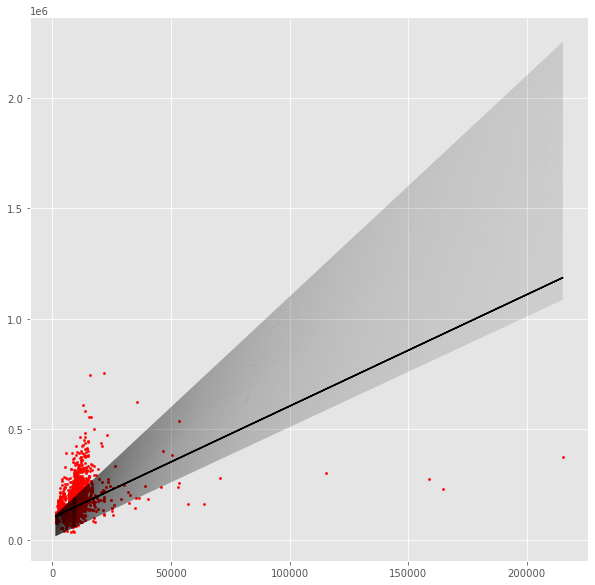

In [10]:
theta_1_min = Theta_1[9][999]
theta_0_min = Theta_0[9][999]
def fitline(theta_0, theta_1, LotArea):
    x = []
    for i in range(m):
        x.append(theta_0 + (theta_1 * LotArea[i]))
    return x
fig = plt.figure(figsize = (10,10))
style.use('ggplot')
count = 0
for i in range(len(theta_0)):
    plt.plot(df.LotArea,fitline(theta_0[i], theta_1[i], df.LotArea), color = 'k', alpha = 0.1, linewidth = 0.1)
    count += 1
print(count)
plt.scatter(df.LotArea, df.SalePrice, s = 5, c = 'r')
plt.plot(df.LotArea, (theta_0_min + (theta_1_min * df.LotArea)), color = 'k')
plt.show()

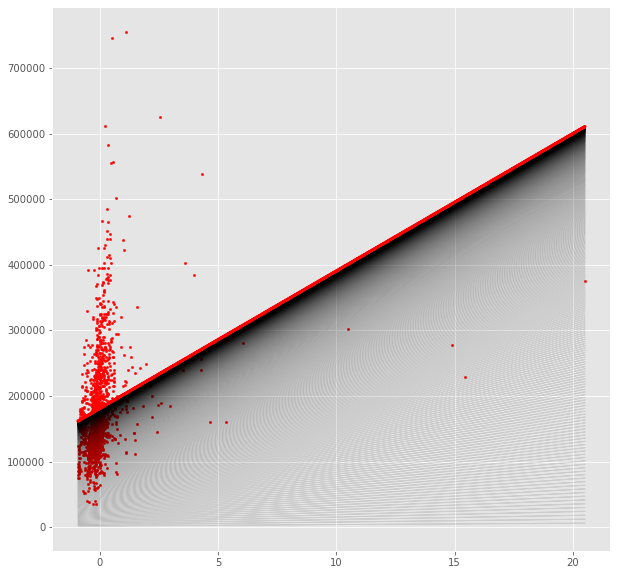

In [13]:
from sklearn import preprocessing
x = df.LotArea
y = df.SalePrice
x = preprocessing.scale(x)
theta_0_gd = 0
theta_1_gd = 0
alpha = 0.01
h_theta_0_gd = 1
h_theta_1_gd = 1
epoch = 0
fig = plt.figure(figsize = (10,10))
style.use('ggplot')
plt.scatter(x, y, s = 5, c = 'r')
while h_theta_0_gd != 0 or h_theta_0_gd != 0:
    if epoch > 1000:
        break
    h_theta_0_gd = 0
    h_theta_1_gd = 0
    for i in range(m):
        h_theta_0_gd += (theta_0_gd + (theta_1_gd * x[i]) - y[i])
        h_theta_1_gd += ((theta_0_gd + (theta_1_gd * x[i]) - y[i]) * x[i])
    h_theta_0_gd = (1/m) * h_theta_0_gd
    h_theta_1_gd = (1/m) * h_theta_1_gd
    theta_0_gd -= (alpha * h_theta_0_gd)
    theta_1_gd -= (alpha * h_theta_1_gd)
    plt.plot(x,(theta_0_gd + (theta_1_gd * x)), color = 'k', alpha = 0.1, linewidth = 1)
    epoch += 1
plt.plot(x,(theta_0_gd + (theta_1_gd * x)), color = 'r', linewidth = 3)
plt.show()

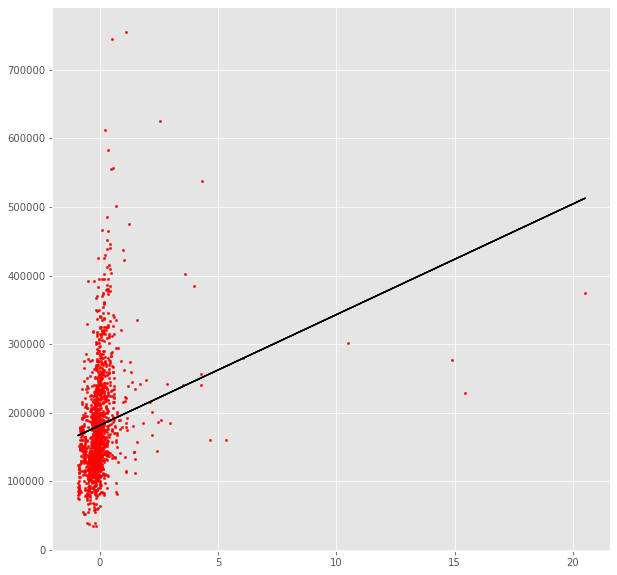

In [14]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
x_model = np.array(df.LotArea).reshape(-1,1)
y_model = np.array(df.SalePrice).reshape(-1,1)
x_model = preprocessing.scale(x_model)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_model, y_model, test_size = 0.33)
clf = LinearRegression()
clf.fit(x_train, y_train)
theta_1_model = clf.coef_
theta_0_model = clf.intercept_
fig = plt.figure(figsize = (10,10))
style.use('ggplot')
plt.scatter(x, y, s = 5, c = 'r')
plt.plot(x_model,(theta_0_model + (theta_1_model * x_model)), color = 'k')